In [1]:
import statsbomb as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import itertools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
import scipy
import matplotsoccer
warnings.filterwarnings("ignore")

### get tournaments data

In [2]:
comps = sb.Competitions()
json_data = comps.data
df = comps.get_dataframe()
competition = df[(df['competition_name'] == 'FIFA World Cup')]
competition.to_csv('data/competition.csv')
competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
18,43,3,International,FIFA World Cup,male,False,True,2018,2021-12-06T23:11:59.985953,2021-06-13T16:17:31.694,None,2021-12-06T23:11:59.985953


### get matches data

In [3]:
matches = sb.Matches(event_id=competition.competition_id.values[0], season_id=competition.season_id.values[0])
matches_df = matches.get_dataframe()
name = str(competition.competition_name.values[0]).replace(' ', '-')
matches_df = matches.get_dataframe()
matches_df.to_csv(f'data/matches-{name}.csv')

### get events data

In [4]:
events_name = ['pass', 'shot', 'dribble', 'miscontrol', 'ball recovery']
matches_df = pd.read_csv('data/matches-FIFA-World-Cup.csv')
matches_df.head()

,Unnamed: 0,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,stadium,referee
0,0,7578,2018-06-15,14:00:00.000,43,3,774,783,0,1,available,scheduled,2021-12-06T22:24:47.980215,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},1,"{'id': 10, 'name': 'Group Stage'}","{'id': 4261, 'name': 'Ekaterinburg Arena', 'co...","{'id': 287, 'name': 'Björn Kuipers', 'country'..."
1,1,7553,2018-06-23,17:00:00.000,43,3,791,794,1,2,available,scheduled,2021-12-06T23:00:56.479071,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},2,"{'id': 10, 'name': 'Group Stage'}","{'id': 256, 'name': 'Rostov Arena', 'country':...","{'id': 727, 'name': 'Milorad Mažić', 'country'..."
2,2,7544,2018-06-20,17:00:00.000,43,3,783,799,1,0,available,scheduled,2021-12-06T22:50:22.229925,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},2,"{'id': 10, 'name': 'Group Stage'}","{'id': 256, 'name': 'Rostov Arena', 'country':...","{'id': 76, 'name': 'Clément Turpin', 'country'..."
3,3,7536,2018-06-18,17:00:00.000,43,3,782,798,3,0,available,scheduled,2021-12-06T22:40:10.487423,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},1,"{'id': 10, 'name': 'Group Stage'}","{'id': 249, 'name': 'Olimpiyskiy Stadion Fisht...","{'id': 743, 'name': 'Janny Sikazwe', 'country'..."
4,4,7555,2018-06-24,20:00:00.000,43,3,789,769,0,3,available,scheduled,2021-12-06T23:06:14.060164,2021-06-13T16:17:31.694,{'data_version': '1.0.2'},2,"{'id': 10, 'name': 'Group Stage'}","{'id': 4258, 'name': ""Kazan' Arena (Kazan')"", ...","{'id': 740, 'name': 'César Arturo Ramos Palazu..."


In [ ]:
events_name = ['pass', 'shot', 'dribble', 'foul committed', 'foul won', 'miscontrol', 'ball recovery']
matches_df = pd.read_csv('data/matches-FIFA-World-Cup.csv')
matches_id = matches_df.match_id.tolist()
for i, match_id in enumerate(matches_id):
    for event in events_name:
        events = sb.Events(event_id=str(match_id))
        events.get_dataframe(event_type=event).to_csv(f'data/events/{event}-{str(match_id)}.csv')
    print(f'{i}th match finished')

### get lineups data and create team_name, team_id dict

In [29]:
for i, match in matches_df.iterrows():
    match_id = match['match_id']
    lineup = sb.Lineups(event_id=str(match_id))
    lineup_df = lineup.get_dataframe()
    lineup_df.to_csv(f'data/lineups/{str(match_id)}.csv')

In [5]:
all_teams = defaultdict(str)
for i, match in matches_df.iterrows():
    match_id = match['match_id']
    lineup_df = pd.read_csv(f'data/lineups/{str(match_id)}.csv')
    teams_name_id = lineup_df.groupby('team_name').team_id.first().to_dict()
    for team_name, team_id in teams_name_id.items():
        all_teams[team_id] = team_name 

all_teams.items()

dict_items([(774, 'Egypt'), (783, 'Uruguay'), (794, 'Mexico'), (791, 'South Korea'), (799, 'Saudi Arabia'), (782, 'Belgium'), (798, 'Panama'), (769, 'Colombia'), (789, 'Poland'), (771, 'France'), (784, 'Peru'), (787, 'Senegal'), (790, 'Sweden'), (780, 'Portugal'), (772, 'Spain'), (781, 'Brazil'), (786, 'Serbia'), (770, 'Germany'), (773, 'Switzerland'), (768, 'England'), (777, 'Tunisia'), (779, 'Argentina'), (785, 'Croatia'), (776, 'Denmark'), (793, 'Iceland'), (775, 'Nigeria'), (795, 'Costa Rica'), (792, 'Australia'), (796, 'Russia'), (778, 'Japan'), (788, 'Morocco'), (797, 'Iran')])

In [6]:
passes_df = pd.read_csv('data/events/pass-7525.csv')
passes_df[['team', 'duration', 'length', 'angle', 'outcome', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y']]

,team,duration,length,angle,outcome,start_location_x,start_location_y,end_location_x,end_location_y
0,Saudi Arabia,1.120,26.019224,-3.103150,NaN,61.0,40.0,35.0,39.0
1,Saudi Arabia,2.960,59.093147,-0.418224,Incomplete,36.0,40.0,90.0,16.0
2,Russia,1.879,9.899495,0.785398,Incomplete,38.0,68.0,45.0,75.0
3,Saudi Arabia,1.200,15.000000,0.000000,NaN,76.0,6.0,91.0,6.0
4,Saudi Arabia,1.120,13.928389,-0.367174,NaN,91.0,8.0,104.0,3.0
...,...,...,...,...,...,...,...,...,...
955,Russia,1.840,17.117243,1.453688,NaN,68.0,27.0,70.0,44.0
956,Russia,1.200,20.808653,0.614663,NaN,73.0,51.0,90.0,63.0
957,Russia,0.680,7.280110,-1.292497,NaN,98.0,59.0,100.0,52.0
958,Russia,0.760,3.000000,1.570796,NaN,99.0,50.0,99.0,53.0


In [7]:
shots_df = pd.read_csv('data/events/shot-7525.csv')
shots_df[['team', 'duration', 'statsbomb_xg','outcome', 'start_location_x', 'start_location_y']]

,team,duration,statsbomb_xg,outcome,start_location_x,start_location_y
0,Saudi Arabia,0.440,0.018845,Blocked,103.0,21.0
1,Russia,0.200,0.044990,Blocked,111.0,52.0
2,Russia,0.560,0.027692,Blocked,107.0,26.0
3,Russia,0.160,0.064957,Blocked,106.0,49.0
4,Russia,1.120,0.091873,Goal,112.0,47.0
5,Saudi Arabia,0.480,0.047389,Blocked,103.0,29.0
6,Saudi Arabia,1.720,0.045468,Off T,92.0,39.0
7,Saudi Arabia,1.775,0.122446,Off T,110.0,42.0
8,Russia,0.693,0.269999,Goal,110.0,34.0
9,Russia,1.573,0.029081,Off T,97.0,50.0


### Pass Analysis

In [28]:
result_df = pd.DataFrame(columns=['pass_count', 'outcome', 'team_result'])

for i, match in matches_df.sort_values('match_id', ascending=True).iterrows():
        match_id = match['match_id']

        home_score = int(match['home_score'])
        away_score = int(match['away_score'])
        home_team = all_teams[match['home_team']]
        away_team = all_teams[match['away_team']]
        diff_score = home_score - away_score

        passes = pd.read_csv(f'data/events/pass-{str(match_id)}.csv')
        passes['outcome'].fillna('Complete', inplace=True)       

        
        home_passes_count = passes[passes['team'] == home_team].shape[0]
        away_passes_count = passes[passes['team'] == away_team].shape[0]

        group_by_outcome = passes.groupby(['team', 'outcome'])['outcome'].count()
        

        if diff_score > 0:
            result_df = result_df.append({'pass_count': home_passes_count, 'outcome': 'all', 'team_result': 'win'}, ignore_index=True)
            result_df = result_df.append({'pass_count': away_passes_count, 'outcome': 'all', 'team_result': 'lose'}, ignore_index=True)

            home_passes = group_by_outcome[home_team]
            for outcome in home_passes.index:
                result_df = result_df.append({'pass_count': home_passes[outcome], 'outcome': outcome, 'team_result': 'win'}, ignore_index=True)
            
            away_passes = group_by_outcome[away_team]
            for outcome in away_passes.index:
                result_df = result_df.append({'pass_count': away_passes[outcome], 'outcome': outcome, 'team_result': 'lose'}, ignore_index=True)

        elif diff_score < 0:
            result_df = result_df.append({'pass_count': home_passes_count, 'outcome': 'all', 'team_result': 'lose'}, ignore_index=True)
            result_df = result_df.append({'pass_count': away_passes_count, 'outcome': 'all', 'team_result': 'win'}, ignore_index=True)

            away_passes = group_by_outcome[away_team]
            for outcome in away_passes.index:
                result_df = result_df.append({'pass_count': away_passes[outcome], 'outcome': outcome, 'team_result': 'win'}, ignore_index=True)

            home_passes = group_by_outcome[home_team]
            for outcome in home_passes.index:
                result_df = result_df.append({'pass_count': home_passes[outcome], 'outcome': outcome, 'team_result': 'lose'}, ignore_index=True)

result_df

,pass_count,outcome,team_result
0,388,all,win
1,572,all,lose
2,272,Complete,win
3,96,Incomplete,win
4,15,Out,win
...,...,...,...
612,448,Complete,lose
613,91,Incomplete,lose
614,1,Injury Clearance,lose
615,12,Out,lose


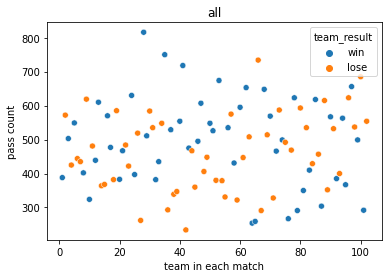

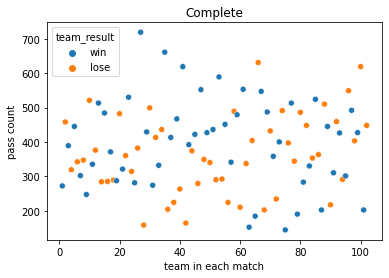

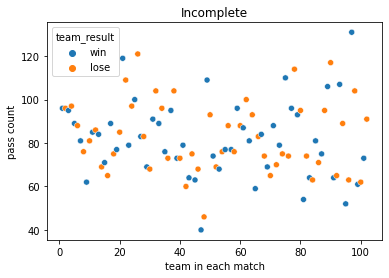

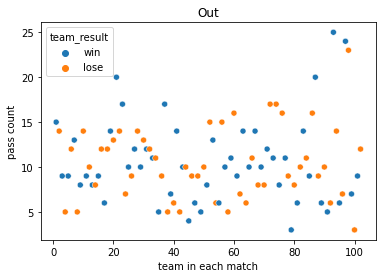

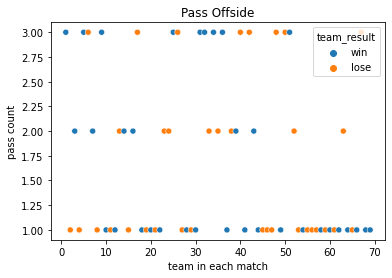

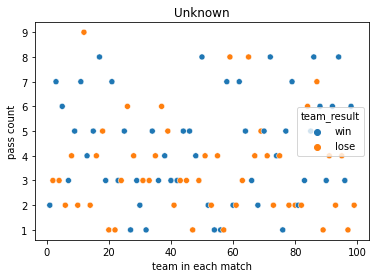

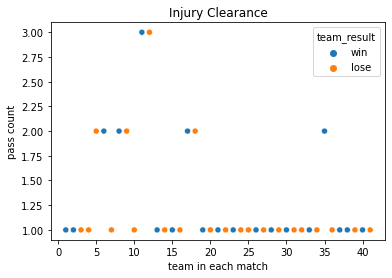

<Figure size 432x288 with 0 Axes>

In [29]:
outcomes = result_df['outcome'].unique().tolist()
# outcomes.remove('Post')
for outcome in outcomes:
    x = result_df[result_df['outcome']==outcome].copy()
    x['index'] = np.arange(1, len(x)+1)
    sns.scatterplot(x='index', y='pass_count', hue='team_result', data=x)
    plt.title(outcome)
    plt.xlabel('team in each match')
    plt.ylabel('pass count')
    plt.figure()

In [30]:
result_df = pd.DataFrame(columns=['pass_count', 'diff_score', 'team_result'])

for i, match in matches_df.sort_values('match_id', ascending=True).iterrows():
        match_id = match['match_id']

        home_score = int(match['home_score'])
        away_score = int(match['away_score'])
        home_team = all_teams[match['home_team']]
        away_team = all_teams[match['away_team']]
        diff_score = abs(home_score - away_score)

        passes = pd.read_csv(f'data/events/pass-{str(match_id)}.csv')
        
        home_passes_count = passes[passes['team'] == home_team].shape[0]
        away_passes_count = passes[passes['team'] == away_team].shape[0]
        

        if diff_score > 0:
            result_df = result_df.append({'pass_count': home_passes_count, 'diff_score': diff_score, 'team_result': 'win'}, ignore_index=True)
            result_df = result_df.append({'pass_count': away_passes_count, 'diff_score': diff_score, 'team_result': 'lose'}, ignore_index=True)


        elif diff_score < 0:
            result_df = result_df.append({'pass_count': home_passes_count, 'diff_score': diff_score, 'team_result': 'lose'}, ignore_index=True)
            result_df = result_df.append({'pass_count': away_passes_count, 'diff_score': diff_score, 'team_result': 'win'}, ignore_index=True)


result_df

,pass_count,diff_score,team_result
0,388,5,win
1,572,5,lose
2,503,2,win
3,425,2,lose
4,549,1,win
...,...,...,...
97,537,1,lose
98,499,2,win
99,685,2,lose
100,292,2,win


Text(0.5, 0, 'goal difference')

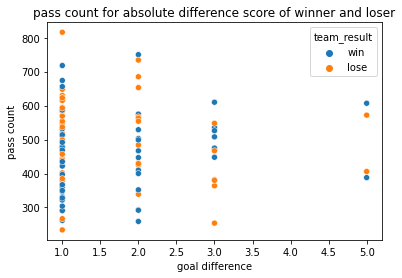

In [32]:
x = result_df.copy()
sns.scatterplot(x='diff_score', y='pass_count', hue='team_result', data=x)
plt.title('pass count for absolute difference score of winner and loser')
plt.ylabel('pass count')
plt.xlabel('goal difference')


In [12]:
columns=['length', 'angle', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y' ,'goal_assist']
result_df = pd.DataFrame(columns=columns)

for i, match in matches_df.sort_values('match_id', ascending=True).iterrows():
        match_id = match['match_id']

        passes = pd.read_csv(f'data/events/pass-{str(match_id)}.csv')
        passes['goal_assist'].fillna(False, inplace=True)

        passes = passes[columns]
        result_df = result_df.append(passes, ignore_index=True)
            
result_df.head()

,length,angle,start_location_x,start_location_y,end_location_x,end_location_y,goal_assist
0,26.019224,-3.103150,61.0,40.0,35.0,39.0,False
1,59.093147,-0.418224,36.0,40.0,90.0,16.0,False
2,9.899495,0.785398,38.0,68.0,45.0,75.0,False
3,15.000000,0.000000,76.0,6.0,91.0,6.0,False
4,13.928389,-0.367174,91.0,8.0,104.0,3.0,False


### shot analysis

In [13]:
result_df = pd.DataFrame(columns=['shot_count', 'outcome', 'team_result'])

for i, match in matches_df.sort_values('match_id', ascending=True).iterrows():
        match_id = match['match_id']

        home_score = int(match['home_score'])
        away_score = int(match['away_score'])
        home_team = all_teams[match['home_team']]
        away_team = all_teams[match['away_team']]
        diff_score = home_score - away_score

        shots = pd.read_csv(f'data/events/shot-{str(match_id)}.csv')
        # shots['outcome'].fillna('Complete', inplace=True)       

        
        home_shots_count = shots[shots['team'] == home_team].shape[0]
        away_shots_count = shots[shots['team'] == away_team].shape[0]

        group_by_outcome = shots.groupby(['team', 'outcome'])['outcome'].count()
        

        if diff_score > 0:
            result_df = result_df.append({'shot_count': home_shots_count, 'outcome': 'all', 'team_result': 'win'}, ignore_index=True)
            result_df = result_df.append({'shot_count': away_shots_count, 'outcome': 'all', 'team_result': 'lose'}, ignore_index=True)

            home_shots = group_by_outcome[home_team]
            for outcome in home_shots.index:
                result_df = result_df.append({'shot_count': home_shots[outcome], 'outcome': outcome, 'team_result': 'win'}, ignore_index=True)
            
            away_shots = group_by_outcome[away_team]
            for outcome in away_shots.index:
                result_df = result_df.append({'shot_count': away_shots[outcome], 'outcome': outcome, 'team_result': 'lose'}, ignore_index=True)

        elif diff_score < 0:
            result_df = result_df.append({'shot_count': home_shots_count, 'outcome': 'all', 'team_result': 'lose'}, ignore_index=True)
            result_df = result_df.append({'shot_count': away_shots_count, 'outcome': 'all', 'team_result': 'win'}, ignore_index=True)

            away_shots = group_by_outcome[away_team]
            for outcome in away_shots.index:
                result_df = result_df.append({'shot_count': away_shots[outcome], 'outcome': outcome, 'team_result': 'win'}, ignore_index=True)

            home_shots = group_by_outcome[home_team]
            for outcome in home_shots.index:
                result_df = result_df.append({'shot_count': home_shots[outcome], 'outcome': outcome, 'team_result': 'lose'}, ignore_index=True)

result_df

,shot_count,outcome,team_result
0,14,all,win
1,6,all,lose
2,4,Blocked,win
3,5,Goal,win
4,3,Off T,win
...,...,...,...
530,4,Blocked,lose
531,2,Goal,lose
532,6,Off T,lose
533,1,Saved,lose


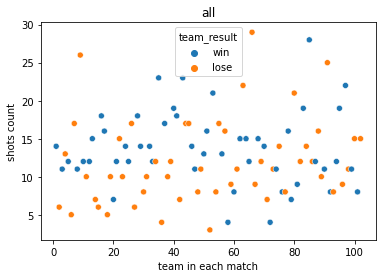

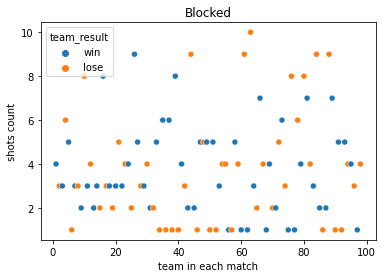

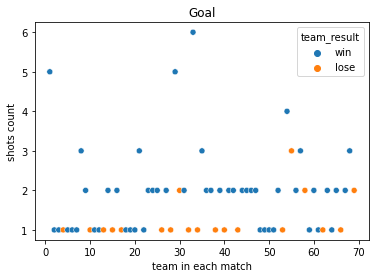

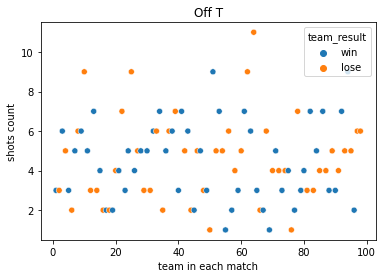

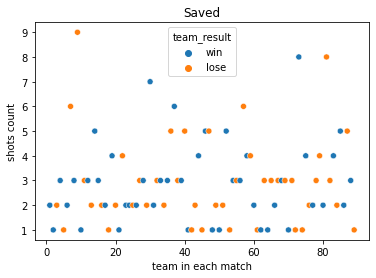

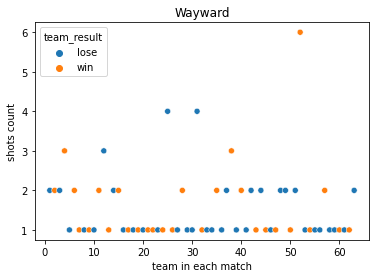

<Figure size 432x288 with 0 Axes>

In [14]:
outcomes = result_df['outcome'].unique().tolist()
outcomes.remove('Post')
for outcome in outcomes:
    x = result_df[result_df['outcome']==outcome].copy()
    x['index'] = np.arange(1, len(x)+1)
    sns.scatterplot(x='index', y='shot_count', hue='team_result', data=x)
    plt.title(outcome)
    plt.xlabel('team in each match')
    plt.ylabel('shots count')
    plt.figure()

In [15]:
result_df = pd.DataFrame(columns=['shot_count', 'diff_score', 'team_result'])

for i, match in matches_df.sort_values('match_id', ascending=True).iterrows():
        match_id = match['match_id']

        home_score = int(match['home_score'])
        away_score = int(match['away_score'])
        home_team = all_teams[match['home_team']]
        away_team = all_teams[match['away_team']]
        diff_score = abs(home_score - away_score)

        shots = pd.read_csv(f'data/events/shot-{str(match_id)}.csv')
        
        home_shots_count = shots[shots['team'] == home_team].shape[0]
        away_shots_count = shots[shots['team'] == away_team].shape[0]
        

        if diff_score > 0:
            result_df = result_df.append({'shot_count': home_shots_count, 'diff_score': diff_score, 'team_result': 'win'}, ignore_index=True)
            result_df = result_df.append({'shot_count': away_shots_count, 'diff_score': diff_score, 'team_result': 'lose'}, ignore_index=True)


        elif diff_score < 0:
            result_df = result_df.append({'shot_count': home_shots_count, 'diff_score': diff_score, 'team_result': 'lose'}, ignore_index=True)
            result_df = result_df.append({'shot_count': away_shots_count, 'diff_score': diff_score, 'team_result': 'win'}, ignore_index=True)

result_df

,shot_count,diff_score,team_result
0,14,5,win
1,6,5,lose
2,11,2,win
3,13,2,lose
4,12,1,win
...,...,...,...
97,11,1,lose
98,11,2,win
99,15,2,lose
100,8,2,win


Text(0.5, 0, 'goal difference')

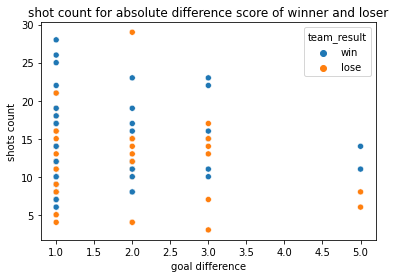

In [20]:
x = result_df.copy()
sns.scatterplot(x='diff_score', y='shot_count', hue='team_result', data=x)
plt.title('shot count for absolute difference score of winner and loser')
plt.ylabel('shots count')
plt.xlabel('goal difference')


In [21]:
result_df = pd.DataFrame(columns=['duration', 'start_location_x', 'start_location_y', 'statsbomb_xg', 'outcome'])

for i, match in matches_df.sort_values('match_id', ascending=True).iterrows():
        match_id = match['match_id']

        shots = pd.read_csv(f'data/events/shot-{str(match_id)}.csv')
        
        for _, shot in shots.iterrows():
                result_df = result_df.append({'duration': shot['duration'], 'start_location_x': shot['start_location_x'],
                                                 'start_location_y': shot['start_location_y'], 'outcome': shot['outcome'],
                                                 'statsbomb_xg': shot['statsbomb_xg']}
                                                 , ignore_index=True)
            
result_df.head()

,duration,start_location_x,start_location_y,statsbomb_xg,outcome
0,0.44,103.0,21.0,0.018845,Blocked
1,0.20,111.0,52.0,0.044990,Blocked
2,0.56,107.0,26.0,0.027692,Blocked
3,0.16,106.0,49.0,0.064957,Blocked
4,1.12,112.0,47.0,0.091873,Goal


Text(0.5, 1.0, 'Dimension reduction of shots features with LDA')

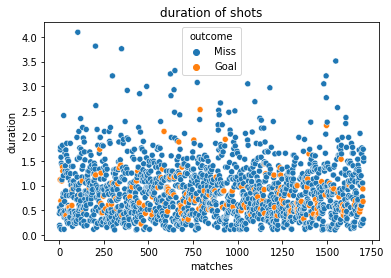

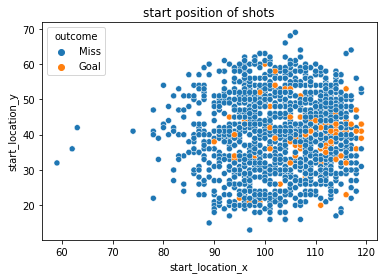

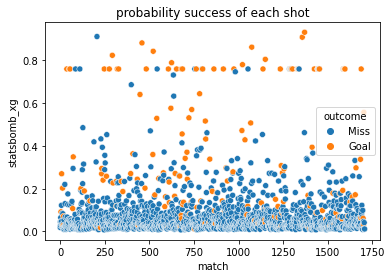

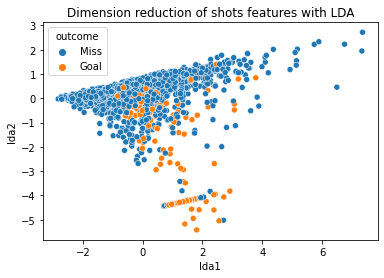

In [26]:
x = result_df.copy()
x['outcome'] = x['outcome'].apply(lambda x: 'Goal' if x == 'Goal' else 'Miss')
x['index'] = np.arange(1, len(x)+1)
sns.scatterplot(x='index', y='duration', hue='outcome', data=x)
plt.xlabel('matches')
plt.title('duration of shots')

plt.figure()
sns.scatterplot(x='start_location_x', y='start_location_y', hue='outcome', data=x)
plt.title('start position of shots')

plt.figure()
sns.scatterplot(x='index', y='statsbomb_xg', hue='outcome', data=x)
plt.title('probability success of each shot')
plt.xlabel('match')


lda = LinearDiscriminantAnalysis(n_components=2)
transformed = lda.fit_transform(result_df[['duration', 'start_location_x', 'start_location_y', 'statsbomb_xg']].values, result_df['outcome'].values)

plt.figure()
transformed = pd.DataFrame(transformed, columns=['lda1', 'lda2'])
transformed['outcome'] = x['outcome']
transformed['index'] = np.arange(1, len(transformed)+1)
sns.scatterplot(x='lda1', y='lda2', hue='outcome', data=transformed)
plt.title('Dimension reduction of shots features with LDA')


Text(0.5, 1.0, 'shot positions')

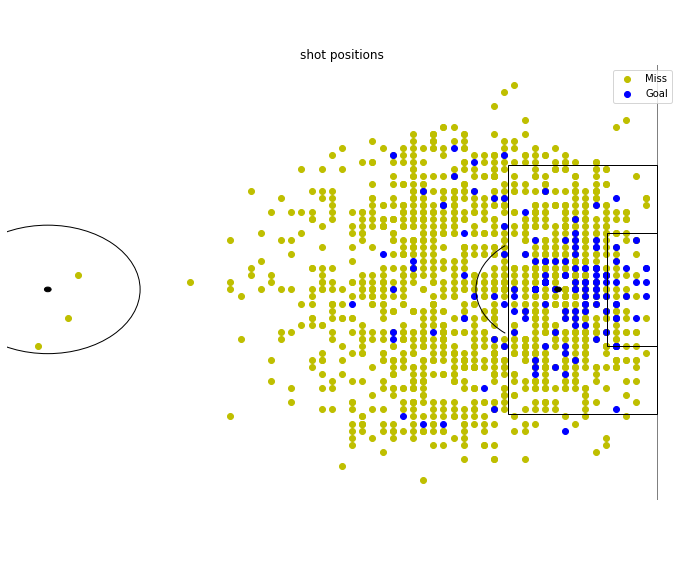

In [27]:
from matplotlib.patches import Arc, Circle, ConnectionPatch, Rectangle
_, ax = plt.subplots(figsize = (12, 8))
ax.axis('off')

def build_pitch():
    _width = 120
    _hight = 80
    return [
            Rectangle((0, 0), width=_width, height=_hight,
                        fill=False, color='grey'),  # pitch
            Rectangle([0, 22.3], width=14.6, height=35.3,
                        fill=False),  # left penalty area
            Rectangle([105.4, 22.3], width=14.6, height=35.3,
                        fill=False),  # right penalty area
            ConnectionPatch([60, 0], [60, 80], "data", "data"),
            Rectangle([0, 32], width=4.9, height=16, fill=False),
            Rectangle([115.1, 32], width=4.9, height=16, fill=False),
            plt.Circle((60, 40), 9.1, color="black", fill=False),
            plt.Circle((60, 40), 0.33, color="black"),
            plt.Circle((9.7, 40), 0.33, color="black"),
            plt.Circle((110.3, 40), 0.33, color="black"),
            Arc((9.7, 40), height=16.2, width=16.2, angle=0,
                theta1=310, theta2=50, color="black"),
            Arc((110.3, 40), height=16.2, width=16.2, angle=0,
                theta1=130, theta2=230, color="black")
            ]
pitch_components = build_pitch()
for c in pitch_components:
    ax.add_artist(c)

plt.scatter(x[x['outcome']=='Miss']['start_location_x'], x[x['outcome']=='Miss']['start_location_y'], c='y', label='Miss')
plt.scatter(x[x['outcome']=='Goal']['start_location_x'], x[x['outcome']=='Goal']['start_location_y'], c='b', label='Goal')
plt.legend()
plt.title('shot positions')

In [33]:
result_df = pd.DataFrame(columns=events_name + ['team_result'])

for i, match in matches_df.iterrows():
    match_id = match['match_id']
    home_score = int(match['home_score'])
    away_score = int(match['away_score'])
    home_team = all_teams[match['home_team']]
    away_team = all_teams[match['away_team']]
    diff_score = abs(home_score - away_score)

    event_counts_home = {}
    event_counts_away = {}

    for event in events_name:
    
        events = pd.read_csv(f'data/events/{event}-{str(match_id)}.csv')
        home_events_count = events[events['team'] == home_team].shape[0]
        away_events_count = events[events['team'] == away_team].shape[0]

        event_counts_home[event] = home_events_count
        event_counts_away[event] = away_events_count
    
    if diff_score > 0:
        result_df = result_df.append({**event_counts_home, 'team_result': 'win'}, ignore_index=True)
        result_df = result_df.append({**event_counts_away, 'team_result': 'lose'}, ignore_index=True)

    elif diff_score < 0:
        result_df = result_df.append({**event_counts_home, 'team_result': 'lose'}, ignore_index=True)
        result_df = result_df.append({**event_counts_away, 'team_result': 'win'}, ignore_index=True)

result_df

,pass,shot,dribble,miscontrol,ball recovery,team_result
0,469,8,9,8,41,win
1,623,16,15,12,61,lose
2,360,17,24,10,38,win
3,495,14,21,11,38,lose
4,511,14,13,14,44,win
...,...,...,...,...,...,...
97,685,15,17,8,34,lose
98,467,12,10,12,50,win
99,484,15,13,14,52,lose
100,674,21,21,21,40,win


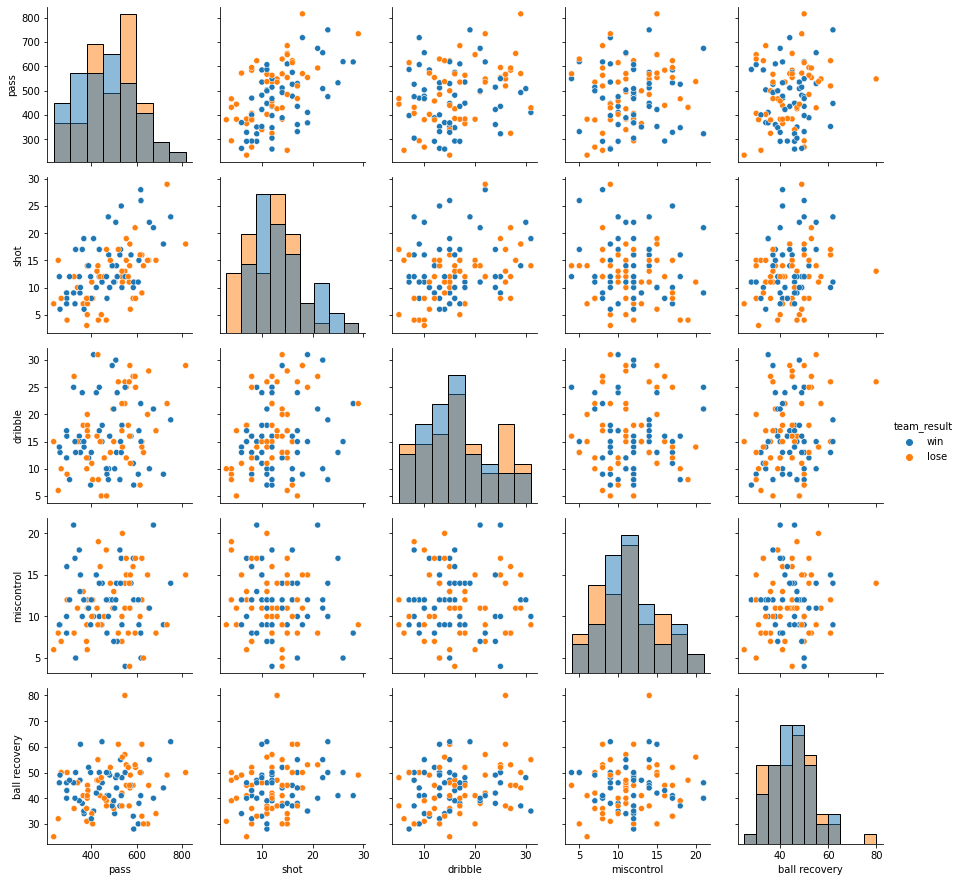

In [34]:
g = sns.PairGrid(result_df, hue="team_result")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

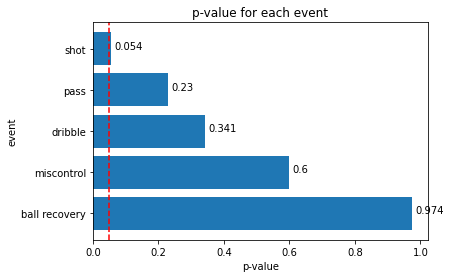

In [35]:
p_values = np.zeros(len(events_name))

for i, event in enumerate(events_name):
    data1 = result_df[result_df['team_result'] == 'win'][event]
    data2 = result_df[result_df['team_result'] == 'lose'][event]
    p_values[i] = scipy.stats.ttest_ind(data1, data2).pvalue

p_values = pd.DataFrame(p_values, index=events_name, columns=['p_value']).sort_values('p_value', ascending=False) 

plt.barh(p_values.index, p_values['p_value'])
plt.title('p-value for each event')
plt.xlabel('p-value')
plt.ylabel('event')

plt.axvline(x=0.05, color='r', linestyle='--')

# add p_values on the end of each bar
for i, p in enumerate(p_values['p_value']):
    plt.text(round(p, 3)+ 0.01, i, round(p, 3), color='black')
    